## Players searching and comparison.

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('classic')
import seaborn as sns; sns.set(style='white')
%matplotlib inline
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
sns.set()
import matplotlib.cm as cm
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
from gap_statistic import OptimalK
from datetime import datetime
from datetime import date
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer


In [2]:
rpl_data= pd.read_excel('/Users/aleksandr/Desktop/rpl_for_model.xlsx')
fnl_general = pd.read_excel('/Users/aleksandr/Desktop/diplom/FNL_general.xlsx')
fnl_passing = pd.read_csv('/Users/aleksandr/Desktop/diplom/FNL_passing.csv')
fnl_data=fnl_general.merge(fnl_passing,how='left', on='Player')
data= rpl_data.append(fnl_data)



In [3]:
data=data.drop(['xG per 90', 'xA per 90', 'Interceptions per 90'],axis=1)
data=data.drop(['xG.1','xA per 90.1', 'xA.1'],axis=1)
data=data[data['Position']!='GK']
data=data[data['Market value']!=0]
data=data[data['Minutes played']>90]

In [4]:
data = data.sort_values(by = ['Player', 'Minutes played'], ascending=True)
data = data.drop_duplicates(subset = ['Player', 'Team'], keep='last')

In [5]:
data.reset_index(inplace=True)
data = data.drop(['index'], axis=1)

In [6]:
data.at[125 , 'Player'] = 'A. Semenov. Neftekhimik'
data.at[126 , 'Player'] = 'A. Semenov. FC Akhmat'
data.at[496 , 'Player'] = 'N. Glushkov. Chayka Peschanokopskoye'
data.at[497 , 'Player'] = 'N. Glushkov. Baltika'
data.at[120 , 'Player'] = 'A. Samsonov. Rotor'
data.at[121 , 'Player'] = 'A. Samsonov. Torpedo Moskva'


In [7]:

player=data['Player']
target=data['Market value']
add_info=data[['Player', 'Market value', 'Team', 'Matches played', 'Minutes played', 'On loan', 'Position']]
data=data.drop(['Player', 'Market value', 'Team', 'Matches played', 'Minutes played', 'On loan','Assists per 90.1'],axis=1)

In [8]:
columns_names = []
for col in data.columns:
    columns_names.append(col)
    
cols_no_mean=['Position','Age', 'Contract expires', 'Birth country', 'Passport country', 'Foot', 'Height']
columns_names_mean= [x for x in columns_names if x not in cols_no_mean]
for i in data[columns_names_mean]:
    data[i] = data[i].fillna(data[i].mean(), inplace=False)
for i in data[cols_no_mean]:
    data[i] = data[i].fillna(0)    

In [9]:
network_metrics = data[['total_passes_closeness', 'total_passes_betw', 'total_passes_pagerank',
       'total_passes_transitivity', 'forward_passes_closeness',
       'forward_passes_betw', 'forward_passes_pagerank',
       'forward_passes_transitivity', 'back_passes_closeness',
       'back_passes_betw', 'back_passes_pagerank', 'back_passes_transitivity',
       'long_passes_closeness', 'long_passes_betw', 'long_passes_pagerank',
       'long_passes_transitivity', 'final_3rd_passes_closeness',
       'final_3rd_passes_betw', 'final_3rd_passes_pagerank',
       'final_3rd_passes_transitivity', 'progressive_passes_closeness',
       'progressive_passes_betw', 'progressive_passes_pagerank','progressive_passes_transitivity']]
#scaler = StandardScaler()
#scaler.fit(network_metrics)
#network_metrics_scaled = scaler.transform(network_metrics)
scaler = MinMaxScaler()  
scaler.fit(network_metrics)
network_metrics_scaled= scaler.transform(network_metrics)

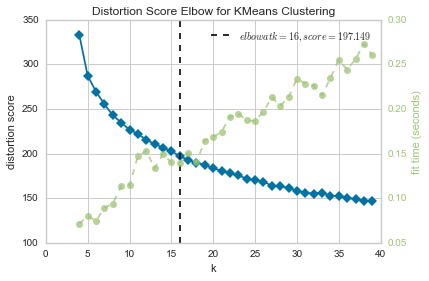

In [10]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(4,40))

visualizer.fit(network_metrics_scaled)        
visualizer.show()  

In [11]:
kmeans = KMeans(n_clusters=16, init='k-means++', max_iter=1000, n_init=5, random_state=42)
roles_clusters= kmeans.fit_predict(network_metrics_scaled)
data['roles_clusters'] = roles_clusters
#data = pd.get_dummies(data, columns=['roles_clusters'])

In [12]:
data=data.drop(['total_passes_closeness', 'total_passes_betw', 'total_passes_pagerank',
       'total_passes_transitivity', 'forward_passes_closeness',
       'forward_passes_betw', 'forward_passes_pagerank',
       'forward_passes_transitivity', 'back_passes_closeness',
       'back_passes_betw', 'back_passes_pagerank', 'back_passes_transitivity',
       'long_passes_closeness', 'long_passes_betw', 'long_passes_pagerank',
       'long_passes_transitivity', 'final_3rd_passes_closeness',
       'final_3rd_passes_betw', 'final_3rd_passes_pagerank',
       'final_3rd_passes_transitivity', 'progressive_passes_closeness',
       'progressive_passes_betw', 'progressive_passes_pagerank',
       'progressive_passes_transitivity'],axis=1)

In [13]:
data['shots on target per 90'] = data['Shots per 90'] * data['Shots on target %']
data['Dribbles succ. per 90'] = data['Dribbles per 90'] * data['Dribbles succ. %']
data['Def duels won per 90'] = data['Def duels per 90'] * data['Def duels won %']
data['Aerial duels won per 90'] = data['Aerial duels per 90'] * data['Aerial duels won %']
data['Tackle succ per 90'] = data['Tackles per 90'] * data['Tackle succ. %']
data['Smt passes acc. per 90'] = data['Smt passes per 90'] * data['Smt passes acc. %']
data['Final 3rd passes acc per90'] = data['Final 3rd passes per 90'] * data['Final 3rd passes acc. %']
data['Thru passes acc per 90'] = data['Thru passes per 90'] * data['Thru passes acc. %']
data['Deep completed passes acc per 90'] = data['Deep completed passes per 90'] * data['Deep completed passes acc. %']
data['Deep completed crosses acc per 90'] = data['Deep completed crosses per 90'] * data['Deep completed crosses acc. %']
data['Passes acc per 90'] = data['Passes per 90'] * data['Passes acc. %']
data['Fwd passes acc per 90'] = data['Fwd passes per 90'] * data['Fwd passes acc. %']
data['Back passes acc'] = data['Back passes per 90'] * data['Back passes acc. %']
data['Lat passes acc'] = data['Lat passes per 90'] * data['Lat passes acc. %']
data['Lng passes acc'] = data['Lng passes per 90'] * data['Lng passes acc. %']

In [14]:
data=data.drop(['Shots per 90','Shots on target %', 'Dribbles per 90', 'Dribbles succ. %',
               'Def duels per 90', 'Def duels won %','Aerial duels per 90','Aerial duels won %',
               'Tackles per 90', 'Tackle succ. %', 'Smt passes per 90', 'Smt passes acc. %', 'Final 3rd passes per 90',
               'Final 3rd passes acc. %','Thru passes per 90', 'Thru passes acc. %', 'Deep completed passes per 90', 
               'Deep completed passes acc. %','Deep completed crosses per 90',  'Deep completed crosses acc. %', 
               'Passes per 90','Passes acc. %','Fwd passes per 90',  'Fwd passes acc. %',  'Back passes per 90',
               'Back passes acc. %','Lat passes per 90', 'Lat passes acc. %','Lng passes per 90', 'Lng passes acc. %'],axis=1)

In [15]:
data['Contract expires'] = data['Contract expires'].replace(0,pd.to_datetime('today') )
data['Contract expires'] = pd.to_datetime(data['Contract expires'])
data['Contract length']= (data['Contract expires'] - pd.to_datetime('today')).astype('timedelta64[D]')
data['Contract length'] = data['Contract length'].replace(-1, 0)
data = data.drop(['Contract expires'],axis=1)

In [16]:
dropped_features = [['Fouls per 90', 'Yellow cards', 'Yellow cards per 90','Red cards', 'Height',
                'Weight','Non-penalty goals', 'Age', 'Goals total','Tackles per opp.30','Interceptions per opp.30',
               'Avg pass length. m', 'Avg lng pass length. m', 'Non-penalty goals per 90','Head goals total','Assists',
               'Shots total', 'xG', 'Red cards per 90', 'Succ. att. actions',
               'Goal conv.. %', 'xA', 'Crosses. %', 'Passes to penalty area acc. %',
               'Back passes acc', 'Lat passes acc', 'Lng passes acc', 'Contract length']]
data=data.drop(['Fouls per 90', 'Yellow cards', 'Yellow cards per 90','Red cards', 'Height',
                'Weight','Non-penalty goals', 'Age', 'Goals total','Tackles per opp.30','Interceptions per opp.30',
               'Avg pass length. m', 'Avg lng pass length. m', 'Non-penalty goals per 90','Head goals total','Assists',
               'Shots total', 'xG', 'Red cards per 90', 'Succ. att. actions',
               'Goal conv.. %', 'xA', 'Crosses. %', 'Passes to penalty area acc. %',
               'Back passes acc', 'Lat passes acc', 'Lng passes acc', 'Contract length'],axis=1)

In [17]:
def recode_nation(column):
    if column == 'Russia':
        return 1
    if column == 'Armenia':
        return 1
    if column == 'Kyrgyzstan':
        return 1
    if column == 'Kazakhstan':
        return 1
    if column == 'Ukraine':
        return 1
    else:
        return 0
    
    
data['Birth country'] =data['Birth country'].apply(recode_nation) 
data['Passport country'] =data['Passport country'].apply(recode_nation)
#data = pd.get_dummies(data, columns=['Position', 'Birth country', 'Passport country', 'Foot'])
position = data['Position']
data=data.drop(['Position'],axis=1)
#data = pd.get_dummies(data, columns=[ 'Birth country', 'Passport country', 'Foot'])
data=data.drop(['Birth country', 'Passport country', 'Foot','Passes acc per 90'],axis=1)

In [18]:
data.shape

(709, 25)

In [19]:
data.head(1)

,Goals per 90,Head goals per 90,Assists per 90,Crosses per 90,Touches in box per 90,Progressive runs per 90,Succ. def. per 90,Shots blocked per 90,Second assists per 90,Third assists per 90,Key passes per 90,Passes to penalty area per 90,Progressive passes per 90,roles_clusters,shots on target per 90,Dribbles succ. per 90,Def duels won per 90,Aerial duels won per 90,Tackle succ per 90,Smt passes acc. per 90,Final 3rd passes acc per90,Thru passes acc per 90,Deep completed passes acc per 90,Deep completed crosses acc per 90,Fwd passes acc per 90
0,0.24,0.0,0.06,2.16,2.22,1.71,4.25,0.06,0.06,0.0,0.32,2.86,4.63,3,76.0833,330.2692,393.813,95.269,6.3346,25.3365,165.2508,25.5391,89.25,57.0,450.7029


In [20]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Goals per 90,Head goals per 90,Assists per 90,Crosses per 90,Touches in box per 90,Progressive runs per 90,Succ. def. per 90,Shots blocked per 90,Second assists per 90,Third assists per 90,Key passes per 90,Passes to penalty area per 90,Progressive passes per 90,roles_clusters,shots on target per 90,Dribbles succ. per 90,Def duels won per 90,Aerial duels won per 90,Tackle succ per 90,Smt passes acc. per 90,Final 3rd passes acc per90,Thru passes acc per 90,Deep completed passes acc per 90,Deep completed crosses acc per 90,Fwd passes acc per 90
Goals per 90,1,0.516025,0.189003,0.0792347,0.586095,0.151017,-0.211532,-0.119133,0.0756694,0.0320813,0.209654,0.126459,-0.273193,0.0404688,0.72188,0.294928,-0.120261,-0.000668828,-0.109995,0.214723,-0.179784,0.170397,0.265085,-0.00740995,-0.0949695
Head goals per 90,0.516025,1,0.00286065,-0.111961,0.351188,-0.0576447,-0.103003,-0.0398107,0.0482224,0.00564897,0.0503814,-0.0596117,-0.141919,0.0269671,0.359078,-0.00737166,-0.104351,0.114257,-0.0564088,0.0341426,-0.0944099,0.0479486,0.0888509,-0.0990077,0.00111002
Assists per 90,0.189003,0.00286065,1,0.262706,0.277024,0.185048,-0.100862,-0.0587113,0.117258,0.0929912,0.407884,0.24408,-0.0856303,0.020965,0.221193,0.266495,-0.0599344,-0.0454606,-0.0483857,0.242392,-0.0143794,0.164245,0.263889,0.17278,0.0045253
Crosses per 90,0.0792347,-0.111961,0.262706,1,0.192902,0.487112,-0.058864,-0.155889,0.0970322,0.0554824,0.328897,0.502323,-0.0246918,0.0560715,0.146501,0.553389,0.0914783,-0.165607,-0.0323782,0.174159,-0.118663,0.0718144,0.200058,0.529347,-0.0374465
Touches in box per 90,0.586095,0.351188,0.277024,0.192902,1,0.214927,-0.300115,-0.211949,0.11153,-0.00171751,0.333245,0.143932,-0.417967,0.100737,0.726349,0.421678,-0.145355,0.101268,-0.104636,0.276895,-0.345542,0.134046,0.35524,0.100419,-0.181191
Progressive runs per 90,0.151017,-0.0576447,0.185048,0.487112,0.214927,1,-0.046448,-0.167309,0.145361,0.0819459,0.295304,0.31665,0.0525328,0.0682085,0.240157,0.695123,0.152184,-0.144467,-0.0493189,0.241911,0.0834157,0.163784,0.305205,0.266433,0.0217561
Succ. def. per 90,-0.211532,-0.103003,-0.100862,-0.058864,-0.300115,-0.046448,1,0.561628,-0.00202424,0.0617631,-0.0791356,0.000842508,0.179994,-0.0241611,-0.24763,-0.147739,0.741253,0.266351,0.425871,-0.0917681,0.181062,-0.0441721,-0.0863014,0.0225984,0.425133
Shots blocked per 90,-0.119133,-0.0398107,-0.0587113,-0.155889,-0.211949,-0.167309,0.561628,1,-0.0193017,0.046298,-0.101535,-0.0760882,0.124678,-0.0275102,-0.189155,-0.208193,0.2461,0.36496,0.106794,-0.0682809,0.0930877,-0.0271798,-0.111836,-0.0496001,0.331315
Second assists per 90,0.0756694,0.0482224,0.117258,0.0970322,0.11153,0.145361,-0.00202424,-0.0193017,1,0.425643,0.157161,0.144796,-0.0772317,0.0704116,0.116265,0.136237,0.0635557,0.0399353,-0.014423,0.188256,-0.0116489,0.115382,0.219602,0.09101,-0.0440249
Third assists per 90,0.0320813,0.00564897,0.0929912,0.0554824,-0.00171751,0.0819459,0.0617631,0.046298,0.425643,1,0.050062,0.126023,0.0217753,0.0498104,0.0220666,0.063953,0.0828034,-0.0124271,0.0440293,0.0924184,0.113922,0.109794,0.129896,0.0198873,0.0364628


In [21]:

scaler = MinMaxScaler()  
scaler.fit(data)
data_scaled= scaler.transform(data)

#scaler = StandardScaler()
#scaler.fit(data)
#data_scaled = scaler.transform(data)

#data_scaled = preprocessing.Normalizer().fit(data)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


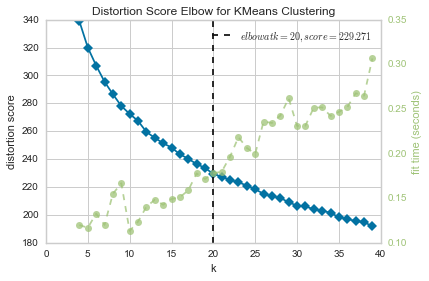

In [22]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(4,40))

visualizer.fit(data_scaled)        # Fit the data to the visualizer
visualizer.show()  

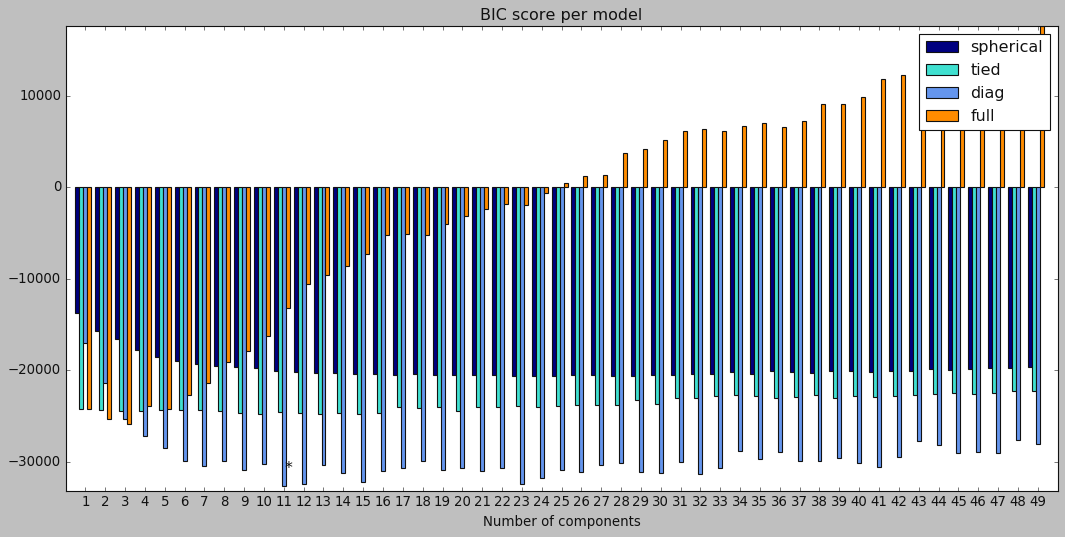

In [23]:
import numpy as np
import itertools
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import mixture
mpl.style.use('classic')



X = data_scaled
lowest_bic = np.infty
bic = []
n_components_range = range(1, 50)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type, random_state = 42)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(16, 16))
plt.grid(True)
plt.style.use('classic')
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)



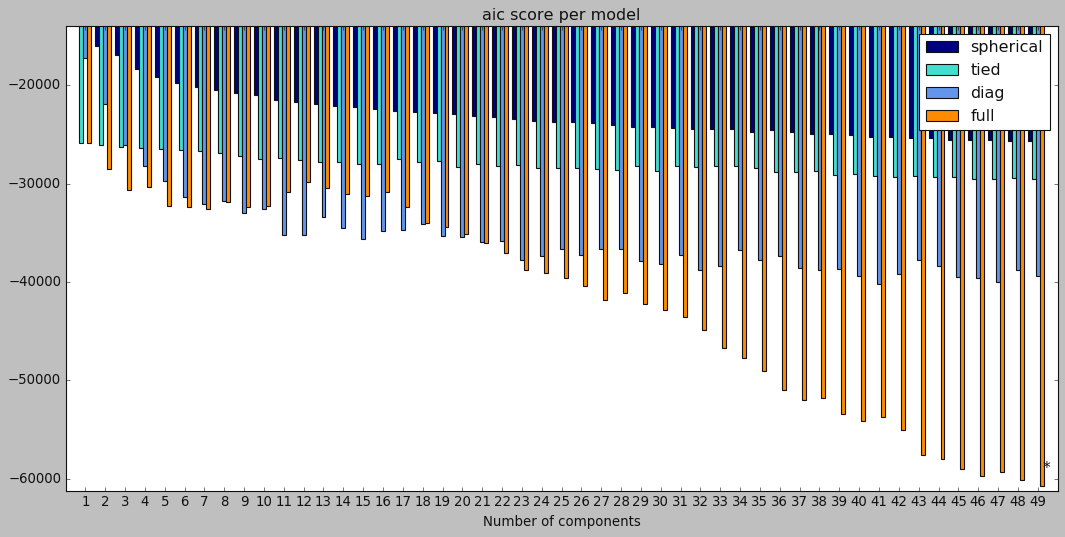

In [24]:
lowest_aic = np.infty
aic = []
n_components_range = range(1, 50)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type, random_state = 42)
        gmm.fit(X)
        aic.append(gmm.aic(X))
        if aic[-1] < lowest_aic:
            lowest_aic = aic[-1]
            best_gmm = gmm

aic = np.array(aic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the aic scores
plt.figure(figsize=(16, 16))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, aic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([aic.min() * 1.01 - .01 * aic.max(), aic.max()])
plt.title('aic score per model')
xpos = np.mod(aic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(aic.argmin() / len(n_components_range))
plt.text(xpos, aic.min() * 0.97 + .03 * aic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)



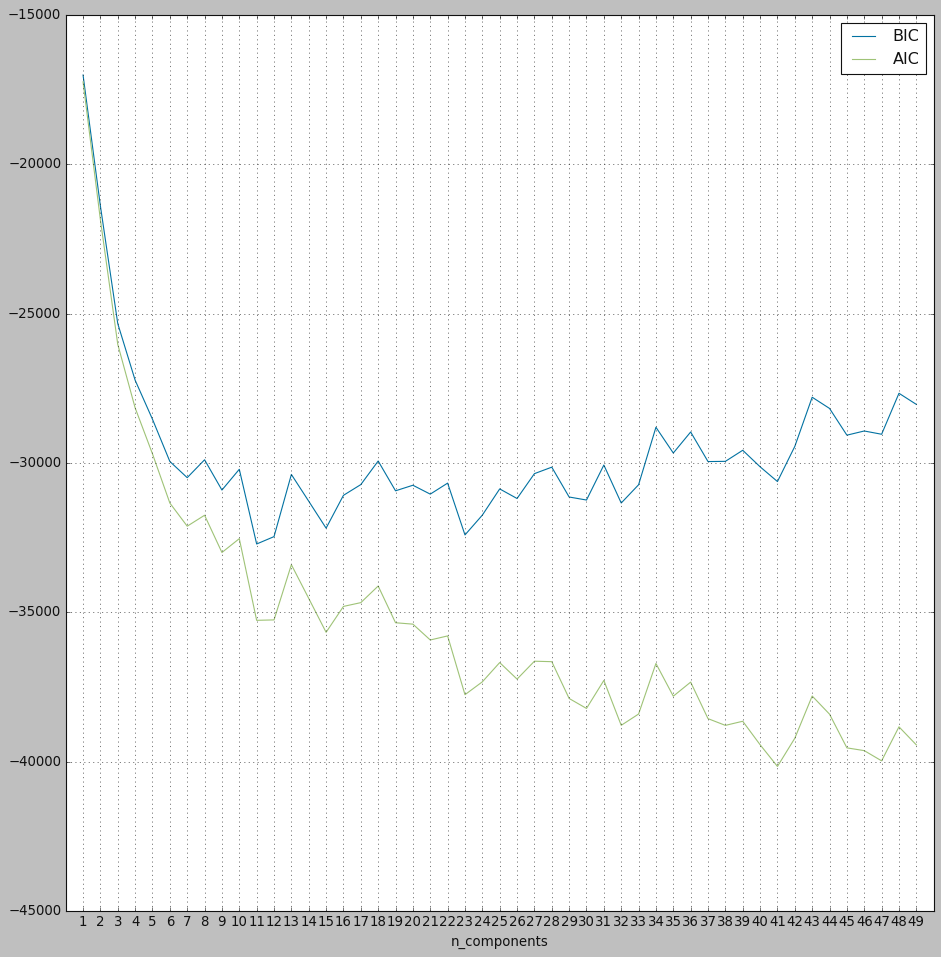

In [25]:
n_components = np.arange(1, 50)
models = [GaussianMixture(n, covariance_type='diag', random_state=42).fit(data_scaled) for n in n_components]
plt.figure(figsize=(14, 14))
plt.plot(n_components, [m.bic(data_scaled) for m in models], label='BIC')
plt.plot(n_components, [m.aic(data_scaled) for m in models], label='AIC')
plt.grid(True)
plt.style.use('classic')
plt.xticks(np.arange(1, 50))
plt.legend(loc='best')
plt.xlabel('n_components');

In [26]:
gmm = GaussianMixture(covariance_type='diag', n_components=23,max_iter=5000, random_state=42, init_params='kmeans')
gmm.fit(data_scaled)
labels = gmm.predict_proba(data_scaled)
cluster_results = pd.DataFrame(labels).round(decimals=3)
cluster_results['Player'] = player